<strong style="text-decoration:underline;">Part 1: K-NN Classification</strong>

In [57]:
import matplotlib.pyplot as plt
import numpy as np


# The following binary classification dataset is created by drawing data from two 3D Gaussians
# Each data point has 3 dimensions


# Mean and covariance for Class 0
mean0 = [0, 0, 0]
cov0 = [[2550, 2000, 1500], [2000, 1500, 1200], [1500, 1200, 1900]]  


# Number of datapoints for class 0
m0 = 100


# Generate class 0 data points from a multivariate (3D) Gaussian distribution
#    Here x0_1, x0_2 and x0_3 are 3 dimensions for each data (feature) point

x0_1, x0_2, x0_3 = np.random.multivariate_normal(mean0, cov0, m0).T


# Concatenate the 3 dimensions of each feature to create the data matrix for class 0 
X0 = np.concatenate((x0_1.reshape(-1, 1), x0_2.reshape(-1, 1), x0_3.reshape(-1, 1)), axis=1)

# Create the target vector for class 0 (target is coded with zero)
X0_target = np.zeros((m0,), dtype=np.int).reshape(-1, 1)

print(X0.shape)



# Mean and covariance for Class 1
mean1 = [30, 30, 30]
cov1 = [[2550, 2000, 1500], [2000, 1500, 1200], [1500, 1200, 1900]] 

# Number of datapoints for class 1
m1 = 100


# Generate class 1 data points from a multivariate (3D) Gaussian distribution
#    Here x1_1, x1_2 and x1_3 are 2 dimensions for each data (feature) point
x1_1, x1_2, x1_3 = np.random.multivariate_normal(mean1, cov1, m1).T

# Concatenate the 3 dimensions of each feature to create the data matrix for class 1
X1 = np.concatenate((x1_1.reshape(-1, 1), x1_2.reshape(-1, 1), x1_3.reshape(-1, 1)), axis=1)

# Create the target vector for class 1 (target is coded with one)
X1_target = np.ones((m1,), dtype=np.int).reshape(-1, 1)
      
      
print(X1.shape)


#  Class 0 and 1 data are combined to create a single data matrix X
X = np.append(X0, X1, axis=0)

# Target values for class 0 & 1 are combined to create a single target vector
y = np.concatenate((X0_target, X1_target), axis=0)


(100, 3)
(100, 3)


C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: covariance is not symmetric positive-semidefinite.
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: covariance is not symmetric positive-semidefinite.


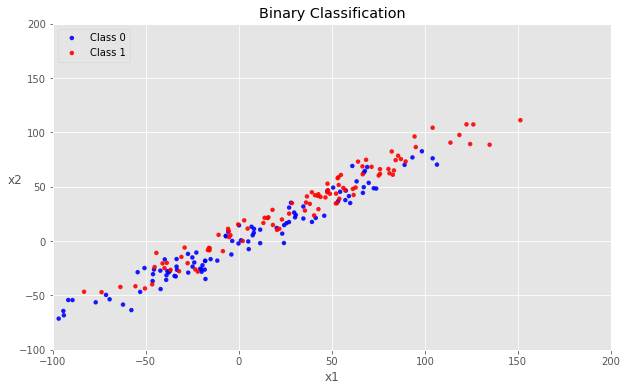

In [58]:
# Draw a scatter plot
fig = plt.figure(figsize=(10, 6))
plt.scatter(X0[:, 0], X0[:, 1],alpha=0.9, c="blue", edgecolors='none', s=20, label="Class 0")
plt.scatter(X1[:, 0], X1[:, 1],alpha=0.9, c="red", edgecolors='none', s=20, label="Class 1")
plt.xlim(-100,200)
plt.ylim(-100,200)
plt.title("Binary Classification")
plt.legend(loc=2)
plt.xlabel("x1")
plt.ylabel("x2", rotation=0)
plt.show()

In [59]:
# from sklearn.preprocessing import scale
# X = scale(X)


# Get the datapoints from each class to plot them
# X0_scaled = X[0:200, :]
# X1_scaled = X[200:, :]

# Draw a scatter plot
# fig = plt.figure(figsize=(10, 6))
# plt.scatter(X0_scaled[:, 0], X0_scaled[:, 1],alpha=0.9, c="blue", edgecolors='none', s=20, label="Class 0")
# plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1],alpha=0.9, c="red", edgecolors='none', s=20, label="Class 1")
# plt.xlim(0,2)
# plt.ylim(0,500)
# plt.title("Binary Classification (After Scaling & Normalization)")
# plt.legend(loc=2)
# plt.xlabel("x1")
# plt.ylabel("x2", rotation=0)
# plt.show()

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_cov = np.cov(X_train)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train_cov)


(160, 3)
(40, 3)
(160, 1)
(40, 1)
[[ 989.61204204 -695.05935033 -863.59500425 ... -264.4099111
   486.12291435 -188.95940215]
 [-695.05935033  514.20341813  654.5687624  ...  165.05260205
  -361.33582397  192.46401233]
 [-863.59500425  654.5687624   842.22309864 ...  192.62560524
  -460.94633606  275.1369939 ]
 ...
 [-264.4099111   165.05260205  192.62560524 ...   87.04305618
  -114.08554962    3.06275978]
 [ 486.12291435 -361.33582397 -460.94633606 ... -114.08554962
   254.02007157 -138.51892697]
 [-188.95940215  192.46401233  275.1369939  ...    3.06275978
  -138.51892697  173.24790155]]


In [61]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Set the the range of K 
neighbors = np.arange(1,50)

# Two arrays to store training and test accuracies
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    
    # The "score" function returns the mean accuracy on the given train/test data and labels.
    # Note that "accuracy" may not be a good performance measure in a skewed data set
    # Thus, we need to do hyperparameter tuning by using better performance measures (e.g., f1 score, presision, recall)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vect

C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vect

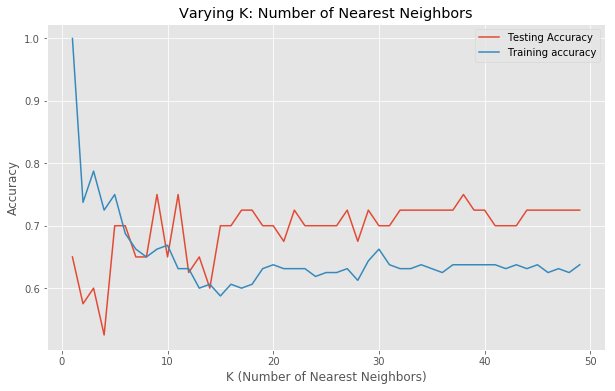

In [62]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 6))
plt.title('Varying K: Number of Nearest Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('K (Number of Nearest Neighbors)')
plt.ylabel('Accuracy')
plt.show()

In [63]:
from sklearn.model_selection import GridSearchCV

# The param_grid tells Scikit-Learn to first evaluate all 50 × 2 = 100 combinations of 
#   n_neighbors and p hyperparameter values specified in the dict
param_grid = {'n_neighbors': np.arange(1,37, 2), 'p': [1, 2, 5,  10, 20, 30, 50, 100], 'weights': ["uniform", "distance"]}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, scoring='f1', cv=3)
knn_cv.fit(X_train, y_train)

print("Best Score: %f" % knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", knn_cv.best_params_)

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

Best Score: 0.626161
Optimal Hyperparameter Values:  {'n_neighbors': 29, 'p': 2, 'weights': 'uniform'}


C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

In [64]:
from sklearn.neighbors import KNeighborsClassifier

covarianceMatrix = np.cov(X_train)
covarianceMatrix = np.linalg.pinv(covarianceMatrix)

print(covarianceMatrix)

knn = KNeighborsClassifier(weights="uniform", algorithm='brute', n_neighbors=1, metric = "mahalanobis", metric_params={'V': covarianceMatrix})
knn.fit(X_train, y_train)

[[ 2.50357196e-06 -7.54828217e-07 -3.33085614e-07 ... -1.46550039e-06
   4.62248686e-07  1.82594540e-06]
 [-7.54828217e-07  3.07607681e-07  2.48082277e-07 ...  3.78328043e-07
  -2.00575797e-07 -3.66799144e-07]
 [-3.33085614e-07  2.48082277e-07  3.16756156e-07 ...  7.77737468e-08
  -1.74433394e-07  9.60577729e-08]
 ...
 [-1.46550039e-06  3.78328043e-07  7.77737468e-08 ...  9.08270694e-07
  -2.22000156e-07 -1.21467343e-06]
 [ 4.62248686e-07 -2.00575797e-07 -1.74433394e-07 ... -2.22000156e-07
   1.32161639e-07  1.96614837e-07]
 [ 1.82594540e-06 -3.66799144e-07  9.60577729e-08 ... -1.21467343e-06
   1.96614837e-07  1.75352052e-06]]


C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
           metric_params={'V': array([[ 2.50357e-06, -7.54828e-07, ...,  4.62249e-07,  1.82595e-06],
       [-7.54828e-07,  3.07608e-07, ..., -2.00576e-07, -3.66799e-07],
       ...,
       [ 4.62249e-07, -2.00576e-07, ...,  1.32162e-07,  1.96615e-07],
       [ 1.82595e-06, -3.66799e-07, ...,  1.96615e-07,  1.75352e-06]])},
           n_jobs=None, n_neighbors=1, p=2, weights='uniform')

In [65]:
from sklearn.model_selection import cross_val_score

# Scoring Parameter for Classification:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Note: For a skewed data set "accuracy" might not be a good choice for scoring
scores = cross_val_score(knn, X_train, y_train, scoring='f1', cv=3)
print(scores)

print("F1 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.5        0.46808511 0.48      ]
F1 Score: 0.48 (+/- 0.03)


C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [66]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)

confusion_matrix(y_train, y_train_pred)

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


array([[44, 38],
       [41, 37]], dtype=int64)

In [67]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train, y_train_pred) 
print("Precision = %f" % precision)

recall = recall_score(y_train, y_train_pred)
print("Recall = %f" % recall)


f1 = f1_score(y_train, y_train_pred)
print("F1 Score = %f" % f1)

Precision = 0.493333
Recall = 0.474359
F1 Score = 0.483660


In [68]:
# The accuracy of the model
score = knn.score(X_test, y_test)
print("Accuracy: %f" % score)


# No. of Correct Predictions
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))



# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_predicted))

Accuracy: 0.650000

No. of correct predictions (Test): 816/40

Confusion Matrix (Test Data):
 [[10  8]
 [ 6 16]]


In [69]:

from sklearn.metrics import precision_score, recall_score, f1_score


precision = precision_score(y_test, y_test_predicted) 
print("Precision = %f" % precision)

recall = recall_score(y_test, y_test_predicted)
print("Recall = %f" % recall)


f1 = f1_score(y_test, y_test_predicted)
print("F1 Score = %f" % f1)

Precision = 0.666667
Recall = 0.727273
F1 Score = 0.695652


<h2>Not Scaled</h2>
<table>
    <tr>
        <th></th>
        <th>weights</th>
        <th>n_neighbors</th>
        <th>p</th>
        <th>accuracy</th>
        <th>precision</th>
        <th>recall</th>
        <th>F1</th>
    </tr>
    <tr>
        <td>1</td>
        <td>distance</td>
        <td>7</td>
        <td>2</td>
        <td>0.700000</td>
        <td>0.587500</td>
        <td>0.602564</td>
        <td>0.594937</td>
    </tr>
    <tr>
        <td>2</td>
        <td>distance</td>
        <td>15</td>
        <td>20</td>
        <td>0.425000</td>
        <td>0.625000</td>
        <td>0.576923</td>
        <td>0.600000</td>
    </tr>
    <tr>
        <td>3</td>
        <td>uniform</td>
        <td>3</td>
        <td>5</td>
        <td>0.550000</td>
        <td>0.550562</td>
        <td>0.628205</td>
        <td>0.586826</td>
    </tr>
    <tr>
        <td>4</td>
        <td>uniform</td>
        <td>5</td>
        <td>1</td>
        <td>0.650000</td>
        <td>0.531646</td>
        <td>0.538462</td>
        <td>0.535032</td>
    </tr>
    <tr>
        <td>5</td>
        <td>uniform</td>
        <td>19</td>
        <td>20</td>
        <td>0.475000</td>
        <td>0.538462</td>
        <td>0.628205</td>
        <td>0.579882</td>
    </tr>
</table>

<h2>Scaled</h2>
<table>
    <tr>
        <th></th>
        <th>weights</th>
        <th>n_neighbors</th>
        <th>p</th>
        <th>accuracy</th>
        <th>precision</th>
        <th>recall</th>
        <th>F1</th>
    </tr>
    <tr>
        <td>1</td>
        <td>distance</td>
        <td>13</td>
        <td>1</td>
        <td>0.500000</td>
        <td>0.494382</td>
        <td>0.564103</td>
        <td>0.526946</td>
    </tr>
    <tr>
        <td>2</td>
        <td>uniform</td>
        <td>15</td>
        <td>10</td>
        <td>0.425000</td>
        <td>0.412500</td>
        <td>0.423077</td>
        <td>0.417722</td>
    </tr>
    <tr>
        <td>3</td>
        <td>uniform</td>
        <td>21</td>
        <td>1</td>
        <td>0.425000</td>
        <td>0.566265</td>
        <td>0.602564</td>
        <td>0.583851</td>
    </tr>
    <tr>
        <td>4</td>
        <td>uniform</td>
        <td>35</td>
        <td>5</td>
        <td>0.725000</td>
        <td>0.614583</td>
        <td>0.756410</td>
        <td>0.678161</td>
    </tr>
    <tr>
        <td>5</td>
        <td>distance</td>
        <td>31</td>
        <td>2</td>
        <td>0.675000</td>
        <td>0.714286</td>
        <td>0.681818</td>
        <td>0.697674</td>
    </tr>
</table>

<h2>Mahalanobis</h2>
<table>
    <tr>
        <th></th>
        <th>weights</th>
        <th>n_neighbors</th>
        <th>p</th>
        <th>accuracy</th>
        <th>precision</th>
        <th>recall</th>
        <th>F1</th>
    </tr>
    <tr>
        <td>1</td>
        <td>uniform</td>
        <td>7</td>
        <td>2</td>
        <td>0.575000</td>
        <td>0.608696</td>
        <td>0.636364</td>
        <td>00.622222</td>
    </tr>
    <tr>
        <td>2</td>
        <td>uniform</td>
        <td>15</td>
        <td>50</td>
        <td>0.650000</td>
        <td>0.567901</td>
        <td>0.589744</td>
        <td>0.578616</td>
    </tr>
    <tr>
        <td>3</td>
        <td>uniform</td>
        <td>13</td>
        <td>1</td>
        <td>0.425000</td>
        <td>0.643836</td>
        <td>0.602564</td>
        <td>0.622517</td>
    </tr>
    <tr>
        <td>4</td>
        <td>uniform</td>
        <td>29</td>
        <td>1</td>
        <td>0.575000</td>
        <td>0.486842</td>
        <td>0.474359</td>
        <td>0.480519</td>
    </tr>
    <tr>
        <td>5</td>
        <td>uniform</td>
        <td>29</td>
        <td>2</td>
        <td>0.650000</td>
        <td>0.493333</td>
        <td>0.474359</td>
        <td>0.483660</td>
    </tr>
</table>

<h3>1.4</h3>
The Mahalanobis seems to have better performace since accuracy was generally higher and more consistent.

<h2 style="text-decoration:underline;">Part 2: Theoretical Analysis of Data Covariance</h2>

In [78]:
import pandas as pd

df = pd.read_csv('/Users/Nick/datasets/DataScienceRepository/winequality-white.csv')

In [75]:
covarianceMatrix = np.cov(df)
print(covarianceMatrix)

[[2343.51251845 1768.26891432 1326.97976082 ... 1520.0381589
  1480.7218007  1325.59195653]
 [1768.26891432 1386.58596602 1004.2904344  ... 1162.5814117
  1150.51598642 1023.68850513]
 [1326.97976082 1004.2904344   758.53734514 ...  869.70815673
   845.62537076  758.746092  ]
 ...
 [1520.0381589  1162.5814117   869.70815673 ... 1001.71068103
   976.62830521  875.11979004]
 [1480.7218007  1150.51598642  845.62537076 ...  976.62830521
   961.57154189  858.23161503]
 [1325.59195653 1023.68850513  758.746092   ...  875.11979004
   858.23161503  767.4807752 ]]


In [77]:
inverseMatrix = np.linalg.pinv(covarianceMatrix)
print(inverseMatrix)

[[ 2.00765204e+04  1.39374511e+04  2.46356116e+04 ... -1.42571734e+04
   2.18762240e+03  9.09006044e+02]
 [-3.41774425e+06 -1.13549486e+06 -2.07284873e+06 ...  1.47624812e+06
  -4.82651623e+05 -2.84173527e+05]
 [ 9.33073764e+04 -3.08840854e+04 -1.19867341e+04 ... -2.57047428e+04
   4.10602196e+04  1.75969756e+04]
 ...
 [-2.67230915e+03  1.20591604e+03  9.77242364e+02 ...  3.49260671e+02
  -9.64333123e+02 -1.08889139e+03]
 [ 1.28639781e+04  8.50850669e+02  3.50263086e+03 ... -4.32385360e+03
   3.11287253e+03  1.40550636e+03]
 [ 2.56456385e+03  7.40943439e+02  2.93555370e+03 ... -2.33220728e+03
   1.10901448e+03  9.49812874e+02]]


<h3>2.1</h3>
The dimension of the covariance matrix of a d x n matrix will be the result of multiplying the dataset by its inverse, a n x d matrix, which, by the rules of matrix multiplication will give a d x d matrix.

<h3>2.3</h3>
The matrix will be singular if the determinant is 0.

In [83]:
matrix = np.matrix('1 2; 2 4')
print(matrix)

covMatrix = np.cov(matrix)
eig = np.linalg.eig(matrix)
det = np.linalg.det(matrix)
print(eig)
print(det)
print(covMatrix)

[[1 2]
 [2 4]]
(array([0., 5.]), matrix([[-0.89442719, -0.4472136 ],
        [ 0.4472136 , -0.89442719]]))
0.0
[[0.5 1. ]
 [1.  2. ]]


<h3>2.4</h3>
Covariance matrices are positive semi-definite. The eigenvalues for the matrix given are 0 and 5, which are all non-negative.

<h3>2.5</h3>
If a matrix is singular, that means it contains linearly dependent columns. In order to make the matrix non-singular, we need to reduce the matrix so that it is linearly independent.

<h3>2.6</h3>
The computational complexity of the Gauss-Jordan elimination method of computing the inverse of an dxd matrix is O(d<sup>3</sup>). This is computed by the number of row operations required to reduce the matrix to its echelon form, which for a two dimensional matrix is roughly 2d<sup>3</sup>/3 operations.